In [1]:
%matplotlib inline
%config Completer.use_jedi = False

from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpdaf.sdetect import Source
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from astropy import wcs
from astropy.coordinates import SkyCoord
import astropy.coordinates.distances as Distance
import matplotlib as mp
import cmasher as cmr
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
from astropy.stats import sigma_clip
from astropy.convolution import Gaussian1DKernel, convolve
from mpdaf import obj
from mpdaf.obj import Cube, Spectrum, WaveCoord, iter_spe
from mpdaf.drs import PixTable
from mpdaf.sdetect import Source, compute_optimal_spectrum
import string as s

from astrodendro import Dendrogram

import glob
pd.set_option('chained_assignment',None)
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)


pd.set_option('chained_assignment',None)

from matplotlib import rc
rc('font',**{'family':'sans','serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [2]:


gal_name = 'MAGPI1206'

galaxy_cube = Cube(f'../data/{gal_name}.fits')

LSD_cat_detections = pd.read_csv(f'../LSD_Cat_outputs_to_groups/LSDCAT_FLUX/{gal_name}_LSDCatFlux_detections_only.csv')




In [3]:
galaxy_cube.info()

[INFO] 3722 x 396 x 396 Cube (../data/MAGPI1206.fits)
[INFO] .data(3722 x 396 x 396) (1e-20 erg / (Angstrom cm2 s)), .var(3722 x 396 x 396)
[INFO] center:(-01:27:06.978,12:00:38.8553) size:(79.200",79.200") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4700.00 max:9351.25 step:1.25 Angstrom


## white light

In [8]:
wli = galaxy_cube.sum(axis=0)

/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()


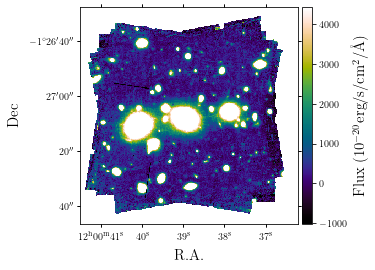

In [9]:
fig = plt.Figure(figsize=(4,4))

fig.canvas.draw()

axs = plt.subplot(projection=wli.wcs.wcs)
cmap = cmr.rainforest  
ax = wli.plot(ax=axs, scale='linear', colorbar='v', zscale=True, cmap=cmap)

axs.set_xlabel('$\mathrm{R.A.}$', fontsize=15)
axs.set_ylabel('$\mathrm{Dec}$', fontsize=15)


ax.colorbar.set_label('$\mathrm{Flux\ (10^{-20}erg/s/cm^2/\AA)}$',  fontsize=15)


fig.tight_layout()

plt.savefig('../outputs/magpi_1206_wl.pdf')

In [ ]:
spec_region_continuum = galaxy_cube.loop_spe_multiprocessing(f=Spectrum.poly_spec, deg=5)

spec_region_continuum.data[np.where(spec_region_continuum.data<0)]=0


spec_region_line_cube = galaxy_cube - spec_region_continuum

In [ ]:
spec_region.write(f'../outputs/{gal_name}_line_and_continuum.fits')
spec_region_continuum.write(f'../outputs/{gal_name}_continuum.fits')
spec_region_line_cube.write(f'../outputs/{gal_name}_line.fits')

## color image

In [145]:
imV = galaxy_cube.get_band_image('Johnson_V')

imR = galaxy_cube.get_band_image('Cousins_R')

imI = galaxy_cube.get_band_image('Cousins_I')

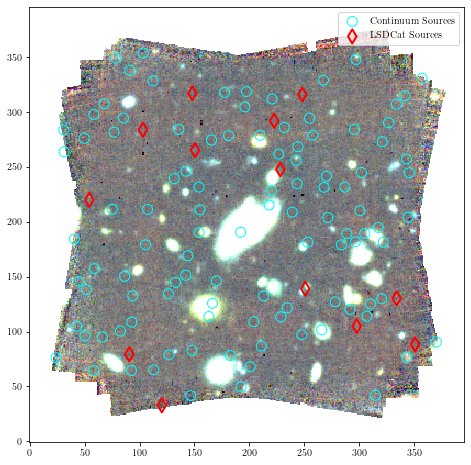

In [146]:
fig, axs = plt.subplots(figsize=(8,8))


ax = obj.plot_rgb([imV,imR,imI], zscale=True, scale='linear',  ax=axs)




axs.scatter(continuum_sources['xcen'], continuum_sources['ycen'], 
            marker='o', edgecolor='cyan', facecolor='None', s=100,linewidths=1,
           label='Continuum Sources')



axs.scatter(emission_line_sources['xcen'], emission_line_sources['ycen'], 
            marker='d', edgecolor='red', facecolor='None', s=100,linewidths=2,
           label='LSDCat Sources')



    



plt.legend()


plt.savefig(f'../outputs/FoV_{gal_name}_wl.pdf')

In [69]:
LSD_cat_detections.LAMBDA_NB_MIN

0     5544.375
1     6024.375
2     6038.125
3     6395.625
4     6506.875
5     6889.375
6     7086.875
7     8575.625
8     8576.875
9     8965.625
10    9013.125
11    6058.125
12    8656.875
Name: LAMBDA_NB_MIN, dtype: float64

## Make NB

In [60]:
def make_segs(s):
    
    



    s.add_seg_images(tags=['LYALPHA'])

    s.find_sky_mask(seg_tags=['LYALPHA'])

    s.find_union_mask(seg_tags=['LYALPHA'])

    s.find_intersection_mask(seg_tags=['LYALPHA'])

    s.images['LYALPHA'].plot(zscale=True)

    return s

[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful obj

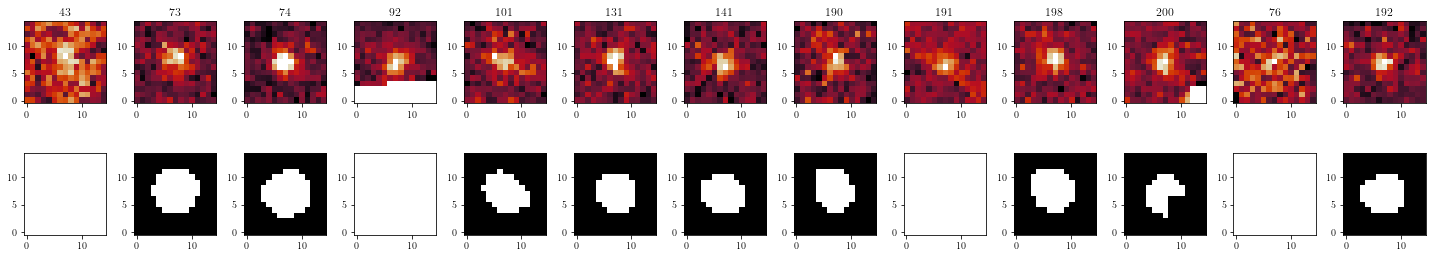

In [62]:
fig, axs = plt.subplots(figsize=(20,4), nrows=2, ncols=len(LSD_cat_detections))

axs = axs.flatten()

fig_counter=0

for index, galaxy in LSD_cat_detections.T.iteritems():
    
    
    s = Source.from_data(ID=1, ra= galaxy.RA_SN, dec= galaxy.DEC_SN,
                         origin=('test','v0.0',gal_name+'.fits', 'v1.00'))

    s.add_white_image(galaxy_cube, size=3)



    s.add_narrow_band_image_lbdaobs(galaxy_cube, tag='LYALPHA' , lbda=galaxy.LAMBDA_SN,
                            size=3,unit_size=u.arcsec, width=galaxy.LAMBDA_NB_MAX-galaxy.LAMBDA_NB_MIN, 
                                   subtract_off=False, margin=10., fband=3.,
                                   method="mean")
    
    s = make_segs(s)
    
    s.write(f'../outputs/source_files/{gal_name}_{galaxy.ID_lsdcat}_LAE_source.fits')
    
    
#     delta_lambda = 0

#     subcube = galaxy_cube.subcube((galaxy.DEC_SN, galaxy.RA_SN), 3.0, unit_center="deg", unit_size="arcsec",
#                                              lbda=(galaxy.LAMBDA_NB_MIN-delta_lambda, galaxy.LAMBDA_NB_MAX+delta_lambda))


#     ax = subcube.sum(axis=0).plot(zscale=True, ax=axs[fig_counter], cmap='cmr.sunburst')
    
    ax = s.images['LYALPHA'].plot(zscale=True, ax=axs[fig_counter], cmap='cmr.sunburst')
    
    ax2 = s.images['SEG_LYALPHA'].plot(zscale=True, ax=axs[fig_counter+len(LSD_cat_detections)], 
                                       cmap='cmr.sunburst')
    
    
    axs[fig_counter].set_title(galaxy.ID_lsdcat)
    
    fig_counter+=1 
    
     
    
plt.tight_layout()

plt.savefig(f'../outputs/LAE_NB_{gal_name}.pdf')

# plt.close()


In [8]:
galaxy

I                             246
ID_lsdcat                     192
X_PEAK_SN_lsdcat              228
Y_PEAK_SN_lsdcat              247
Z_PEAK_SN_lsdcat             3168
NPIX_lsdcat                    46
DETSN_MAX_lsdcat          13.8448
agreed_grade                    1
ID_lsdmeasure                 192
X_PEAK_SN_lsdmeasure          228
Y_PEAK_SN_lsdmeasure          247
Z_PEAK_SN_lsdmeasure         3168
NPIX_lsdmeasure                46
DETSN_MAX_lsdmeasure      13.8448
X_SN                      227.669
Y_SN                      246.654
Z_SN                      3169.04
RA_SN                      180.16
DEC_SN                   -1.44921
LAMBDA_SN                  8661.3
X_FLUX                    227.634
Y_FLUX                    246.733
Z_FLUX                     3168.7
RA_FLUX                    180.16
DEC_FLUX                  -1.4492
LAMBDA_FLUX               8660.88
X_SFLUX                   227.675
Y_SFLUX                   246.664
Z_SFLUX                   3169.04
RA_SFLUX      

## Make 1D spectra

### simple sum 

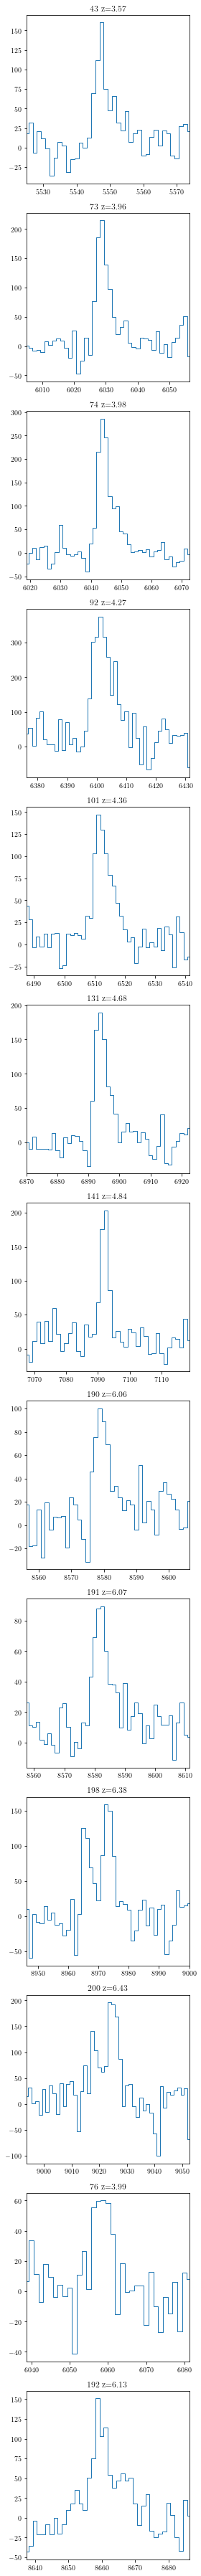

In [4]:
fig, axs = plt.subplots(figsize=(4,50), nrows=len(LSD_cat_detections), ncols=1)

axs = axs.flatten()

fig_counter=0


for index, galaxy in LSD_cat_detections.T.iteritems():
    
    
    
    delta_lambda = 20

    subcube = galaxy_cube.subcube_circle_aperture((galaxy.DEC_SN, galaxy.RA_SN), 1.0, 
                                             lbda=(galaxy.LAMBDA_NB_MIN-delta_lambda, galaxy.LAMBDA_NB_MAX+delta_lambda))

    
    
    ax = subcube.sum(axis=(1,2)).plot(ax=axs[fig_counter])
    axs[fig_counter].set_ylabel('')
    axs[fig_counter].set_xlabel('')
    
    axs[fig_counter].set_title(str(galaxy.ID_lsdcat) + ' z='+str(np.round(((galaxy.LAMBDA_SN/1215)-1), decimals=2)))
    
    fig_counter+=1 
    
#     break 
    
plt.tight_layout()

plt.savefig(f'../outputs/LAE_SPECTRA_{gal_name}.pdf')

# plt.close()



### based on SExtractor

In [10]:
galaxy

I                             246
ID_lsdcat                     192
X_PEAK_SN_lsdcat              228
Y_PEAK_SN_lsdcat              247
Z_PEAK_SN_lsdcat             3168
NPIX_lsdcat                    46
DETSN_MAX_lsdcat          13.8448
agreed_grade                    1
ID_lsdmeasure                 192
X_PEAK_SN_lsdmeasure          228
Y_PEAK_SN_lsdmeasure          247
Z_PEAK_SN_lsdmeasure         3168
NPIX_lsdmeasure                46
DETSN_MAX_lsdmeasure      13.8448
X_SN                      227.669
Y_SN                      246.654
Z_SN                      3169.04
RA_SN                      180.16
DEC_SN                   -1.44921
LAMBDA_SN                  8661.3
X_FLUX                    227.634
Y_FLUX                    246.733
Z_FLUX                     3168.7
RA_FLUX                    180.16
DEC_FLUX                  -1.4492
LAMBDA_FLUX               8660.88
X_SFLUX                   227.675
Y_SFLUX                   246.664
Z_SFLUX                   3169.04
RA_SFLUX      

[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful obj

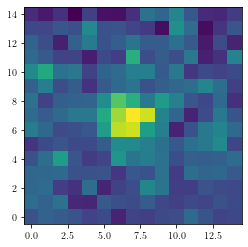

In [56]:


for index, galaxy in LSD_cat_detections.T.iteritems():
    
#     if galaxy.ID_lsdcat!=74: continue

    ### make sure loc and size are similar to the subcube used
    s = Source.from_data(ID=1, ra= galaxy.RA_SN, dec= galaxy.DEC_SN,
                         origin=('test','v0.0',gal_name+'.fits', 'v1.00'))

    s.add_white_image(galaxy_cube, size=3)



    s.add_narrow_band_image_lbdaobs(galaxy_cube, tag='LYALPHA' , lbda=galaxy.LAMBDA_SN,
                            size=3,unit_size=u.arcsec, width=galaxy.LAMBDA_NB_MAX-galaxy.LAMBDA_NB_MIN, 
                                   subtract_off=False, margin=10., fband=3.,
                                   method="mean")


    s.add_seg_images(tags=['LYALPHA'])

    s.find_sky_mask(seg_tags=['LYALPHA'])

    s.find_union_mask(seg_tags=['LYALPHA'])

    s.find_intersection_mask(seg_tags=['LYALPHA'])

    s.images['LYALPHA'].plot(zscale=True)

    s.write(f'../outputs/source_files/{gal_name}_{galaxy.ID_lsdcat}_LAE_source.fits')

#     break 


In [6]:
from mpdaf.obj import Cube, Spectrum, WaveCoord, iter_spe
from mpdaf.drs import PixTable
from mpdaf.sdetect import Source, compute_optimal_spectrum



In [46]:
s.info()

[INFO] ID      =                    1 / object ID %d                                   
[INFO] RA      =    180.1589780192758 / RA u.degree %.7f                               
[INFO] DEC     =   -1.455246732653378 / DEC u.degree %.7f                              
[INFO] FROM    = 'test    '           / detection software                             
[INFO] FROM_V  = 'v0.0    '           / version of the detection software              
[INFO] CUBE    = 'MAGPI1206.fits'     / datacube                                       
[INFO] CUBE_V  = 'v1.00   '           / version of the datacube                        
[INFO] SRC_V   = ''                                                                    
[INFO] 0 spectra: 
[INFO] 2 images: MUSE_WHITE LYALPHA
[INFO] 0 cubes: 
[INFO] 0 tables: 


/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:352: RuntimeWarning: invalid value encountered in true_divide
  newdata = np.nansum(psf * data / var, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:353: RuntimeWarning: divide by zero encountered in true_divide
  newvar = np.nansum(psf, axis=(1, 2)) / d


(8561.301820733264, 8761.301820733264)

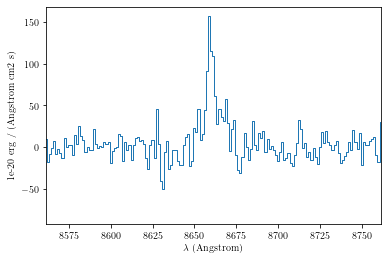

In [68]:
s.spectra['MUSE_TOT'].plot()
plt.xlim(galaxy.LAMBDA_SN-100, galaxy.LAMBDA_SN+100)

(8561.301820733264, 8761.301820733264)

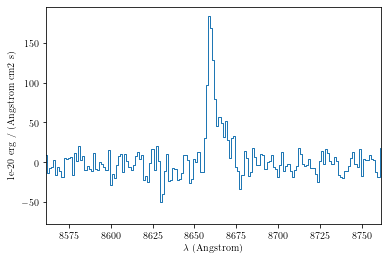

In [67]:
s.spectra['LYALPHA'].plot()
plt.xlim(galaxy.LAMBDA_SN-100, galaxy.LAMBDA_SN+100)

[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:352: RuntimeWarning: invalid value encountered in true_divide
  newdata = np.nansum(psf * data / var, axis=(1, 2)) / d
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:353: RuntimeWarning: divide by zero encountered in true_divide
  newvar = np.nansum(psf, axis=(1, 2)) / d
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
[DEBUG] Doing LYALPHA
[DEBUG] Image LYALPHA has one useful objects
/Users/wnanayakkara/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/mpdaf/sdetect/sea.py:352: RuntimeWarning: invalid value encountered in true_divide
  newdata = np

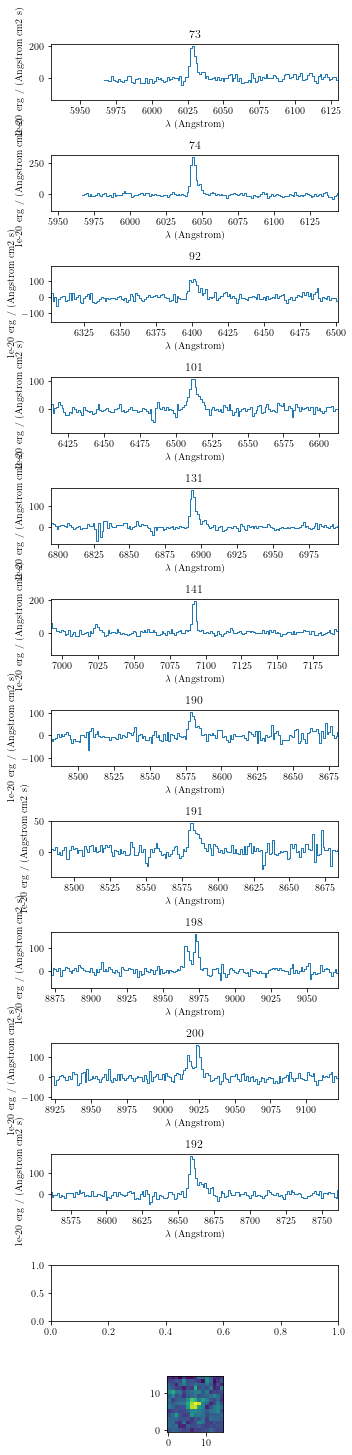

In [92]:
fig, axs = plt.subplots(figsize=(5,20), ncols=1, nrows=len(LSD_cat_detections))

axs = axs.flatten()

fig_counter=0

for index, galaxy in LSD_cat_detections.T.iteritems():
    
    
    s = Source.from_data(ID=1, ra= galaxy.RA_SN, dec= galaxy.DEC_SN,
                         origin=('test','v0.0',gal_name+'.fits', 'v1.00'))

    s.add_white_image(galaxy_cube, size=3)



    s.add_narrow_band_image_lbdaobs(galaxy_cube, tag='LYALPHA' , lbda=galaxy.LAMBDA_SN,
                            size=3,unit_size=u.arcsec, width=galaxy.LAMBDA_NB_MAX-galaxy.LAMBDA_NB_MIN, 
                                   subtract_off=False, margin=10., fband=3.,
                                   method="mean")
    
    s = make_segs(s)

    if s.images['SEG_LYALPHA'].data.sum()==0: 
        continue 
            
    s.extract_spectra(galaxy_cube,skysub=False,obj_mask='SEG_LYALPHA',
                          tags_to_try=['LYALPHA'])
    
    s.write(f'../outputs/source_files/{gal_name}_{galaxy.ID_lsdcat}_LAE_source.fits')
    
    ax = s.spectra['LYALPHA'].plot( ax=axs[fig_counter])
    
    axs[fig_counter].set_xlim(galaxy.LAMBDA_SN-100, galaxy.LAMBDA_SN+100)
    
#     ax2 = s.images['SEG_LYALPHA'].plot(zscale=True, ax=axs[fig_counter+len(LSD_cat_detections)], 
#                                        cmap='cmr.sunburst')
    
    
    axs[fig_counter].set_title(galaxy.ID_lsdcat)
    
    fig_counter+=1 
    
#     break 
    
plt.tight_layout()

plt.savefig(f'../outputs/LAE_spectra_{gal_name}.pdf')

# plt.close()


In [85]:
plt.close()

In [16]:
LSD_cat_detections.filter(like='SN')

,X_PEAK_SN_lsdcat,Y_PEAK_SN_lsdcat,Z_PEAK_SN_lsdcat,DETSN_MAX_lsdcat,X_PEAK_SN_lsdmeasure,Y_PEAK_SN_lsdmeasure,Z_PEAK_SN_lsdmeasure,DETSN_MAX_lsdmeasure,X_SN,Y_SN,Z_SN,RA_SN,DEC_SN,LAMBDA_SN
0,90,79,678,14.953053,90,79,678,14.953053,90.251709,78.377103,678.125273,180.167857,-1.458556,5547.656591
1,150,264,1063,25.725527,150,264,1063,25.725527,149.960951,264.402078,1063.935310,180.164539,-1.448222,6029.919138
2,250,138,1075,41.593075,250,138,1075,41.593075,250.026545,137.948778,1075.978946,180.158978,-1.455247,6044.973683
3,121,32,1361,29.485716,121,32,1361,29.485716,121.035234,32.193886,1361.541130,180.166147,-1.461122,6401.926412
4,101,283,1450,25.033985,101,283,1450,25.033985,101.637994,283.163351,1450.533162,180.167224,-1.447179,6513.166452
5,248,315,1756,30.480976,248,315,1756,30.480976,248.007336,315.198060,1756.256452,180.159090,-1.445400,6895.320565
6,334,130,1914,24.694153,334,130,1914,24.694153,333.960437,129.760690,1913.897385,180.154314,-1.455702,7092.371731
7,54,219,3104,15.582388,54,219,3104,15.582388,53.928147,218.934909,3105.035185,180.169876,-1.450747,8581.293981
8,222,292,3107,22.063002,222,292,3107,22.063002,222.107482,291.672937,3107.200566,180.160530,-1.446707,8584.000707
9,148,316,3417,23.851269,148,316,3417,23.851269,147.546101,316.419904,3417.541078,180.164673,-1.445332,8971.926347


In [11]:
# s.write(f'../outputs/source_files/{gal_name}_{galaxy.ID_lsdcat}_LAE_source.fits')

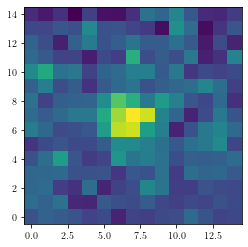

In [58]:
s.images['LYALPHA'].plot(zscale=True)

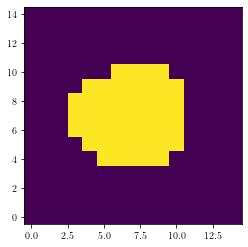

In [59]:
s.images['SEG_LYALPHA'].plot()

In [4]:
s = Source.from_file(f'../outputs/source_files/{gal_name}_{74}_LAE_source.fits')

In [5]:
s.info()

[INFO] ID      =                    1 / object ID %d                                   
[INFO] RA      =    180.1589780192758 / RA u.degree %.7f                               
[INFO] DEC     =   -1.455246732653378 / DEC u.degree %.7f                              
[INFO] FROM    = 'test    '           / detection software                             
[INFO] FROM_V  = 'v0.0    '           / version of the detection software              
[INFO] CUBE    = 'MAGPI1206.fits'     / datacube                                       
[INFO] CUBE_V  = 'v1.00   '           / version of the datacube                        
[INFO] SRC_V   = ''                                                                    
[INFO] FORMAT  = '0.6     '           / Version of the Source format                   
[INFO] 2 spectra: MUSE_TOT LYALPHA
[INFO] 6 images: MUSE_WHITE LYALPHA SEG_LYALPHA MASK_SKY MASK_UNION MASK_INTER
[INFO] 0 cubes: 
[INFO] 0 tables: 


In [98]:
%matplotlib notebook

(-50.0, 50.0)

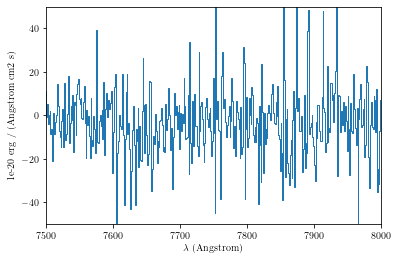

In [12]:
s.spectra['LYALPHA'].plot()
plt.xlim(7500, 8000)
plt.ylim(-50, 50)


NameError: name 'galaxy' is not defined

In [ ]:

#### individual images using the builtin plot routine in mpdaf

narrow_bands = [ 'HEII', 'ARIV', 'HBETA', 'OIII5007','HALPHA', 'SII6717', 'SII6731' ]
narrow_bands_labels = [r'HeII$\lambda$4685', r'[ArIV]$\lambda$4711', r'H$\beta$', r'[OIII]$\lambda$5007'  
                      ,r'H$\alpha$' , r'[SII]$\lambda$6717', r'[SII]$\lambda$6731']

fig, axs = plt.subplots(nrows=2, ncols=len(narrow_bands), figsize=(3*len(narrow_bands),6))

for inb, nb in enumerate(narrow_bands):
    
    
    img = s_updated.images[narrow_bands[inb]]
    img.plot(zscale=True, use_wcs=False, ax=axs[0, inb] )
    
    img = s_updated.images['SEG_' + narrow_bands[inb]]
    img.plot(zscale=True, use_wcs=False, ax=axs[1, inb] )

    

    axs[0, inb].set_title(narrow_bands_labels[inb], fontsize=15)

    axs[0, inb].set_xlim(0,14)
    axs[0, inb].set_ylim(0,14)
    axs[1, inb].set_xlim(0,14)
    axs[1, inb].set_ylim(0,14)
    
    
plt.tight_layout()

plt.savefig('../outputs_UV_analysis/SDSSJ0908_HeII_region_sex_outs_images.pdf')